In [10]:
import os
#PROJECT ABANDONED AS P VALUE IS TOO HIGH TO PERFORM THIS
# P = 0.95 :/, TIME TO FIND SOMETHING NEW
from statsmodels.tsa.stattools import adfuller


from statsmodels.tsa.seasonal import seasonal_decompose
cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

print ("os.getcwd() returns an object of type {0}".format(type(cwd)))

# copy the filepath 
os.chdir ("D:\Power BI thing\Forage Data sets\JPMC Data analyst")
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from datetime import date,timedelta


df = pd.read_csv('At_Gas.csv', parse_dates=['Dates'])
prices = df['Prices'].values
dates = df['Dates'].values

#Convert date to datetimeformat and set as index
df['Dates'] = pd.to_datetime(df['Dates'], infer_datetime_format=True)
df = df.set_index(['Dates'])

df['Prices_diff'] = df['Prices'].diff(periods=12)
df['Prices_diff'].fillna(method='backfill', inplace=True)
df.info()

prices_diff = df['Prices_diff'].values
print(prices_diff)
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(prices)

Current working directory: D:\Power BI thing\Forage Data sets\JPMC Data analyst
os.getcwd() returns an object of type <class 'str'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prices       48 non-null     float64
 1   Prices_diff  48 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.9   0.4   0.6   0.9   0.6   0.3   0.86  0.4   0.4   0.1   0.6
  0.9   0.4   0.2   0.6  -0.1   0.5   0.8   0.5   0.5   0.9   0.7   0.7
  0.8   0.6   1.2   0.5   0.7   0.7   0.6   0.2   0.6   0.2   0.4   0.3 ]
ADF Statistic: 0.21807686170000193
p-value: 0.9732574388448694
Non-Stationary


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_30068\555149555.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('At_Gas.csv', parse_dates=['Dates'])
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_30068\555149555.py:28: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Dates'] = pd.to_datetime(df['Dates'], infer_datetime_format=True)
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_30068\555149555.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [11]:
# Performing ADF
def perform_adf_test(data):
    # Perform ADF test
    result = adfuller(data)

    # Print the results
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Check if the data is stationary based on the p-value
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary, Data can be processed further")

# Example Usage
perform_adf_test(df['Prices'])

ADF Statistic: 0.21807686170000193
p-value: 0.9732574388448694
Critical Values: {'1%': np.float64(-3.6209175221605827), '5%': np.float64(-2.9435394610388332), '10%': np.float64(-2.6104002410518627)}
The data is not stationary, Data can be processed further


C:\Users\Nikhil\AppData\Local\Temp\ipykernel_30068\3767790906.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_30068\3767790906.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


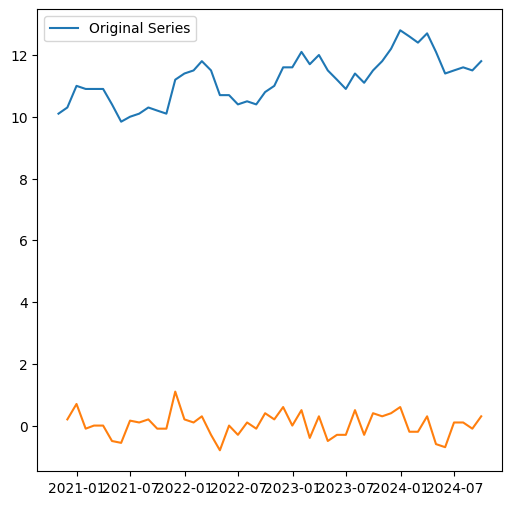

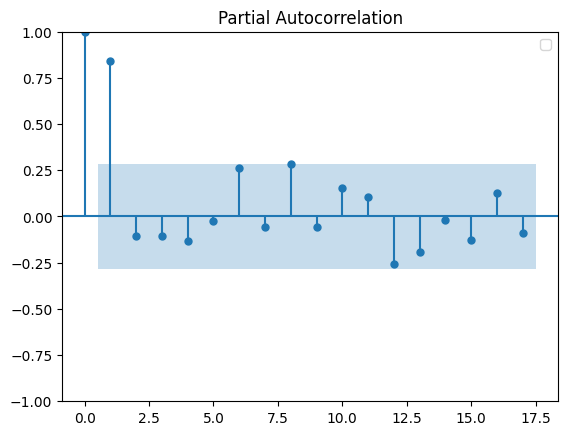

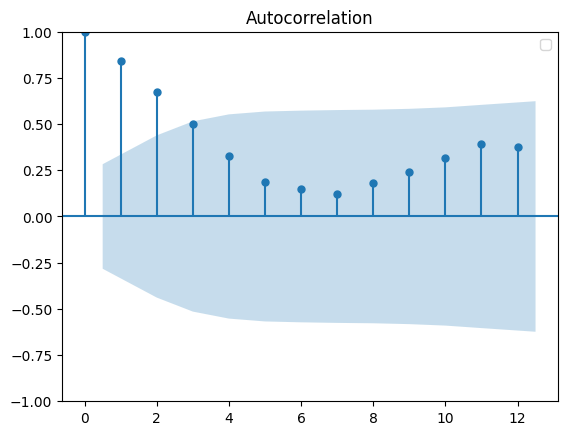

In [ ]:
#DIFFERENCING
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_differencing_acf_pacf(data):
    fig, axes = plt.subplots(3, 2, sharex=True)

    # Original Series
    axes[0, 0].plot(data)
    axes[0, 0].set_title('Original Series')
    plot_acf(data, ax=axes[0, 1],lags=12)

    # 1st Differencing
    diff_1 = data.diff().dropna()
    axes[1, 0].plot(diff_1)
    axes[1, 0].set_title('1st Order Differencing')
    plot_acf(diff_1, ax=axes[1, 1],lags=12)

    # 2nd Differencing
    diff_2 = data.diff().diff().dropna()
    axes[2, 0].plot(diff_2)
    axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(diff_2, ax=axes[2, 1],lags=12)

    plt.tight_layout()
    plt.show()

#plot_differencing_acf_pacf(prices)
plt.figure(figsize=(6,6))

plt.plot(df['Prices'], label='Original Series')
plt.legend()
diff_1 = df['Prices'].diff().dropna()
plt.plot(diff_1)

plot_pacf(prices)
plt.legend()
plot_acf(prices,lags=12)
plt.legend()
